<a href="https://colab.research.google.com/github/EddyEjembi/Weather-Prediction-Project/blob/master/WeatherPred__Models_Building.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("/content/Training_data.csv")
data.dropna(inplace=True)
data.head(10)

,Atmospheric Pressure,Cloud Cover (%),Dew Point,UV Index,Visibility,Wind Gust,humidity,precip_mm,temp_c,wind_kmph,city_encoded,condition_encoded,year,month,day,hour,month_sin,month_cos,hour_sin,hour_cos
0,0.113987,1.229855,0.580229,-0.163094,0.327851,-0.030745,0.264319,-0.245888,0.757689,-0.030745,3,7,2022,6,1,0,1.224647e-16,-1.0,0.000000,1.000000e+00
1,0.113987,1.229855,0.580229,-0.163094,0.327851,-0.030745,0.264319,-0.245888,0.757689,-0.030745,3,7,2022,6,1,1,1.224647e-16,-1.0,0.258819,9.659258e-01
2,0.113987,1.229855,0.580229,-0.163094,0.327851,-0.030745,0.264319,-0.245888,0.757689,-0.030745,3,7,2022,6,1,2,1.224647e-16,-1.0,0.500000,8.660254e-01
3,0.113987,1.229855,0.580229,-0.163094,0.327851,-0.030745,0.264319,-0.245888,0.757689,-0.030745,3,7,2022,6,1,3,1.224647e-16,-1.0,0.707107,7.071068e-01
4,0.113987,1.229855,0.580229,-0.163094,0.327851,-0.030745,0.264319,-0.245888,0.757689,-0.030745,3,7,2022,6,1,4,1.224647e-16,-1.0,0.866025,5.000000e-01
5,0.113987,1.229855,0.580229,-0.163094,0.327851,-0.030745,0.264319,-0.245888,0.757689,-0.030745,3,7,2022,6,1,5,1.224647e-16,-1.0,0.965926,2.588190e-01
6,0.113987,1.229855,0.580229,-0.163094,0.327851,-0.030745,0.264319,-0.245888,0.757689,-0.030745,3,7,2022,6,1,6,1.224647e-16,-1.0,1.000000,6.123234e-17
7,0.113987,1.229855,0.580229,-0.163094,0.327851,-0.030745,0.264319,-0.245888,0.757689,-0.030745,3,7,2022,6,1,7,1.224647e-16,-1.0,0.965926,-2.588190e-01
8,0.113987,1.229855,0.580229,-0.163094,0.327851,-0.030745,0.264319,-0.245888,0.757689,-0.030745,3,7,2022,6,1,8,1.224647e-16,-1.0,0.866025,-5.000000e-01
9,0.113987,1.229855,0.580229,-0.163094,0.327851,-0.030745,0.264319,-0.245888,0.757689,-0.030745,3,7,2022,6,1,9,1.224647e-16,-1.0,0.707107,-7.071068e-01


In [3]:
X = data.drop(['condition_encoded', 'year'], axis=1)
y = data['condition_encoded']

In [4]:
y

0        7
1        7
2        7
3        7
4        7
        ..
49681    8
49682    8
49683    8
49684    8
49685    0
Name: condition_encoded, Length: 49686, dtype: int64

In [5]:
#import required libraries
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, BatchNormalization, Flatten
from keras.callbacks import EarlyStopping

In [6]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
"""# Convert DataFrame to NumPy array
X_train = X_train.values
X_test = X_test.values

# Reshape the input data to be 3-dimensional (samples, timesteps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)"""

'# Convert DataFrame to NumPy array\nX_train = X_train.values\nX_test = X_test.values\n\n# Reshape the input data to be 3-dimensional (samples, timesteps, features)\nX_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)\nX_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)'

In [ ]:
"""X_train = np.transpose(X_train, (0, 2, 1))
X_test = np.transpose(X_test, (0, 2, 1))"""

'X_train = np.transpose(X_train, (0, 2, 1))\nX_test = np.transpose(X_test, (0, 2, 1))'

In [7]:
X_train

,Atmospheric Pressure,Cloud Cover (%),Dew Point,UV Index,Visibility,Wind Gust,humidity,precip_mm,temp_c,wind_kmph,city_encoded,month,day,hour,month_sin,month_cos,hour_sin,hour_cos
7361,-0.798457,-0.725500,0.632416,-0.163094,0.327851,0.458197,0.141549,-0.245888,1.204848,0.458197,3,4,3,17,8.660254e-01,-0.500000,-0.965926,-2.588190e-01
17298,-0.342235,0.879642,0.319292,-0.163094,0.327851,1.902799,-0.267686,1.243842,-0.055329,1.902799,2,7,1,16,-5.000000e-01,-0.866025,-0.866025,-5.000000e-01
1457,1.482652,0.120847,0.293199,-0.990234,0.327851,1.102712,0.264319,-0.245888,-0.095979,1.102712,3,7,31,17,-5.000000e-01,-0.866025,-0.965926,-2.588190e-01
5201,-0.798457,-1.192450,0.214918,1.491187,0.327851,0.702668,-0.185839,-0.245888,0.147926,0.702668,3,1,3,17,5.000000e-01,0.866025,-0.965926,-2.588190e-01
38537,0.570208,-1.250819,0.084449,1.491187,0.327851,-1.386448,0.305242,-0.245888,-0.868346,-1.386448,1,1,12,13,5.000000e-01,0.866025,-0.258819,-9.659258e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0.113987,0.383507,0.371479,-0.990234,0.327851,-1.297550,0.509860,-0.245888,-0.665091,-1.297550,5,10,4,3,-8.660254e-01,0.500000,0.707107,7.071068e-01
44732,0.570208,0.383507,0.593275,-0.163094,0.327851,-0.030745,0.428013,-0.245888,0.513783,-0.030745,4,10,17,15,-8.660254e-01,0.500000,-0.707107,-7.071068e-01
38158,0.570208,-0.988160,-0.502658,1.491187,0.327851,-1.630919,-0.144916,-0.245888,-0.258583,-1.630919,1,12,27,18,-2.449294e-16,1.000000,-1.000000,-1.836970e-16
860,1.482652,0.616982,0.462807,-0.990234,0.327851,0.213726,0.714477,0.498977,-0.461837,0.213726,3,7,6,20,-5.000000e-01,-0.866025,-0.866025,5.000000e-01


In [8]:
X_train2 = X_train.values
X_test2 = X_test.values
# Reshape the input data to be 3-dimensional (samples, timesteps, features)
X_train2 = np.reshape(X_train2, (X_train2.shape[0], 1, X_train2.shape[1]))
X_test2 = np.reshape(X_test2, (X_test2.shape[0], 1, X_test2.shape[1]))

In [9]:
# Build the LSTM model Architecture
model_dense = Sequential()
model_dense.add(LSTM(units=64, return_sequences=True, input_shape=(1, X_train2.shape[2])))
model_dense.add(Dropout(0.2))
model_dense.add(LSTM(units=64, return_sequences=True))
model_dense.add(Dropout(0.2))
model_dense.add(LSTM(units=64, return_sequences=True))
model_dense.add(Dropout(0.2))
model_dense.add(Dense(units=32, activation='relu'))
model_dense.add(Dense(units=1, activation='sigmoid'))

In [ ]:
"""model = Sequential()
model.add(Dense(units=64, activation='relu', input_shape=(X_train_resampled.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))"""

In [10]:
model_dense.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 64)             21248     
                                                                 
 dropout (Dropout)           (None, 1, 64)             0         
                                                                 
 lstm_1 (LSTM)               (None, 1, 64)             33024     
                                                                 
 dropout_1 (Dropout)         (None, 1, 64)             0         
                                                                 
 lstm_2 (LSTM)               (None, 1, 64)             33024     
                                                                 
 dropout_2 (Dropout)         (None, 1, 64)             0         
                                                                 
 dense (Dense)               (None, 1, 32)             2

In [11]:
import tensorflow as tf
adam = tf.keras.optimizers.Adam(learning_rate=0.001)

model_dense.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

# Define EarlyStopping callback
early_stopping = EarlyStopping(patience=10, monitor='val_loss', restore_best_weights=True)

In [ ]:
history = model_dense.fit(X_train2, y_train, batch_size=32, epochs=100, validation_data=(X_test2, y_test), callbacks=[early_stopping])

Epoch 1/100
1243/1243 [==============================] - 19s 10ms/step - loss: -42.6012 - accuracy: 0.4114 - val_loss: -44.6980 - val_accuracy: 0.4787
Epoch 2/100
1243/1243 [==============================] - 11s 9ms/step - loss: -45.7344 - accuracy: 0.5195 - val_loss: -45.2126 - val_accuracy: 0.5289
Epoch 3/100
1243/1243 [==============================] - 10s 8ms/step - loss: -45.8673 - accuracy: 0.5306 - val_loss: -45.2378 - val_accuracy: 0.5302
Epoch 4/100
1243/1243 [==============================] - 9s 7ms/step - loss: -46.0059 - accuracy: 0.5379 - val_loss: -45.3096 - val_accuracy: 0.5356
Epoch 5/100
1243/1243 [==============================] - 11s 9ms/step - loss: -45.9486 - accuracy: 0.5342 - val_loss: -45.5040 - val_accuracy: 0.5572
Epoch 6/100
1243/1243 [==============================] - 11s 9ms/step - loss: -45.9017 - accuracy: 0.5332 - val_loss: -45.1977 - val_accuracy: 0.5263
Epoch 7/100
1243/1243 [==============================] - 11s 9ms/step - loss: -45.9324 - accuracy: 0

In [ ]:
# Evaluate the model
_, accuracy = model_dense.evaluate(X_test2, y_test)
print(f'Test Accuracy: {accuracy}')
print(f'Test Loss: {_}')

311/311 [==============================] - 1s 3ms/step - loss: -45.5971 - accuracy: 0.5569
Test Accuracy: 0.5568524599075317
Test Loss: -45.59705352783203


In [12]:
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression() : 
Training Accuracy :  0.8671631277045386
Validation Accuracy :  0.8659690078486617

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4189
           1       0.80      0.91      0.85      1527
           2       0.47      0.36      0.40        59
           3       0.89      0.53      0.67        88
           4       0.52      0.59      0.55        22
           5       0.84      0.90      0.87       170
           6       0.40      0.24      0.30       157
           7       0.76      0.77      0.76       766
           8       0.86      0.83      0.84      1615
           9       0.19      0.05      0.08        62
          10       0.76      0.70      0.73      1141
          11       0.66      0.56      0.61       142

    accuracy                           0.87      9938
   macro avg       0.67      0.62      0.64      9938
weighted avg       0.86      0.87      0.86      9938

Con

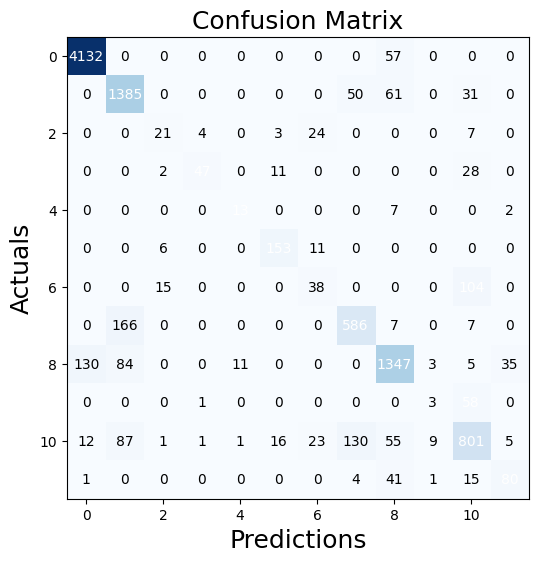



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...) : 
Training Accuracy :  1.0
Validation Accuracy :  1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4189
           1       1.00      1.00      1.00      

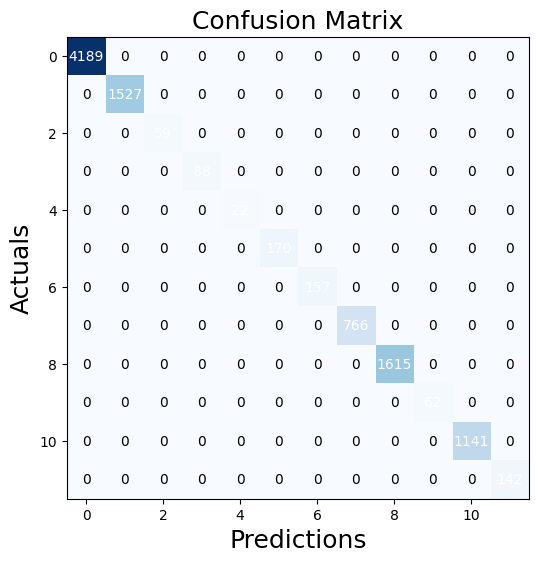



SVC(probability=True) : 
Training Accuracy :  0.8759182851967394
Validation Accuracy :  0.8719058160595693

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      4189
           1       0.74      0.96      0.84      1527
           2       0.77      0.80      0.78        59
           3       1.00      0.47      0.64        88
           4       1.00      0.64      0.78        22
           5       0.97      0.92      0.94       170
           6       0.81      0.33      0.47       157
           7       0.87      0.62      0.72       766
           8       0.86      0.89      0.88      1615
           9       1.00      0.10      0.18        62
          10       0.75      0.73      0.74      1141
          11       1.00      0.16      0.28       142

    accuracy                           0.87      9938
   macro avg       0.89      0.63      0.68      9938
weighted avg       0.88      0.87      0.86      9938



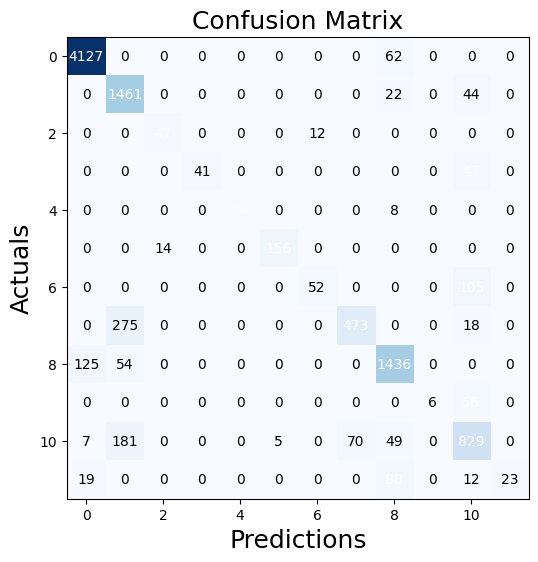



KNeighborsClassifier() : 
Training Accuracy :  0.9623880446814934
Validation Accuracy :  0.8841819279533105

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      4189
           1       0.80      0.87      0.83      1527
           2       0.89      1.00      0.94        59
           3       0.92      0.91      0.91        88
           4       0.73      1.00      0.85        22
           5       1.00      0.95      0.97       170
           6       0.92      0.84      0.88       157
           7       0.81      0.81      0.81       766
           8       0.82      0.78      0.80      1615
           9       0.92      0.92      0.92        62
          10       0.89      0.77      0.83      1141
          11       0.91      0.84      0.87       142

    accuracy                           0.88      9938
   macro avg       0.88      0.89      0.88      9938
weighted avg       0.88      0.88      0.88      9938


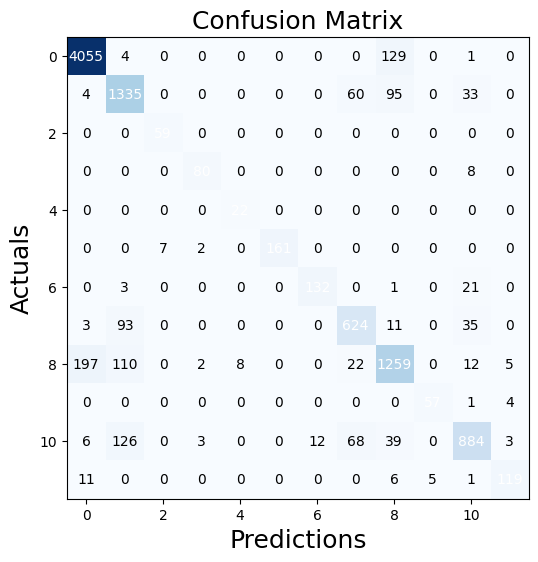



AdaBoostClassifier(n_estimators=100, random_state=42) : 
Training Accuracy :  0.6374157190298883
Validation Accuracy :  0.636445964982894

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4189
           1       0.00      0.00      0.00      1527
           2       0.00      0.00      0.00        59
           3       0.00      0.00      0.00        88
           4       0.00      0.00      0.00        22
           5       0.42      0.03      0.05       170
           6       0.00      0.00      0.00       157
           7       0.00      0.00      0.00       766
           8       0.34      0.99      0.51      1615
           9       0.00      0.00      0.00        62
          10       0.50      0.46      0.48      1141
          11       0.00      0.00      0.00       142

    accuracy                           0.64      9938
   macro avg       0.19      0.21      0.17      9938
weighted avg       0.54 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


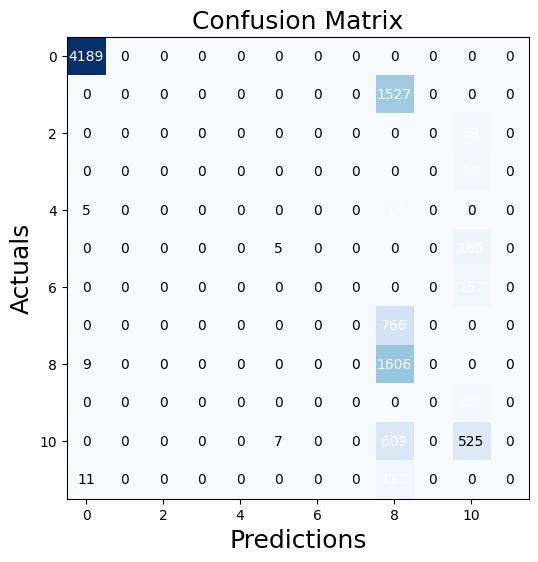

In [14]:
from mlxtend.plotting import plot_confusion_matrix
models = [LogisticRegression(), XGBClassifier(), SVC(kernel='rbf', probability=True), KNeighborsClassifier(n_neighbors=5), AdaBoostClassifier(n_estimators=100, random_state=42)]

for i in range(5):
  models[i].fit(X_train, y_train)

  print(f'{models[i]} : ')

  train_preds = models[i].predict(X_train)
  print('Training Accuracy : ', metrics.accuracy_score(y_train, train_preds))

  val_preds = models[i].predict(X_test)
  print('Validation Accuracy : ', metrics.accuracy_score(y_test, val_preds))
  print()
  print("Classification Report:")
  print(metrics.classification_report(y_test, val_preds))
  print("Confusion Matix: ")
  conf_matrix = metrics.confusion_matrix(y_test, val_preds)

  #Display Confusion Matrix
  fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(6, 6), cmap=plt.cm.Blues)
  plt.xlabel('Predictions', fontsize=18)
  plt.ylabel('Actuals', fontsize=18)
  plt.title('Confusion Matrix', fontsize=18)
  plt.show()
  print()
  print()



In [15]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'learning_rate': [1, 2, 3],
    'n_estimators': [100, 500, 1000]
}
cv = GridSearchCV(models[4], param_grid=parameters, scoring='f1_micro', n_jobs=-1, verbose=3)
cv.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(estimator=AdaBoostClassifier(n_estimators=100, random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [1, 2, 3],
                         'n_estimators': [100, 500, 1000]},
             scoring='f1_micro', verbose=3)

Training Accuracy :  0.6374157190298883
Validation Accuracy :  0.636445964982894

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4189
           1       0.00      0.00      0.00      1527
           2       0.00      0.00      0.00        59
           3       0.00      0.00      0.00        88
           4       0.00      0.00      0.00        22
           5       0.42      0.03      0.05       170
           6       0.00      0.00      0.00       157
           7       0.00      0.00      0.00       766
           8       0.34      0.99      0.51      1615
           9       0.00      0.00      0.00        62
          10       0.50      0.46      0.48      1141
          11       0.00      0.00      0.00       142

    accuracy                           0.64      9938
   macro avg       0.19      0.21      0.17      9938
weighted avg       0.54      0.64      0.56      9938

Confusion Matix: 


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


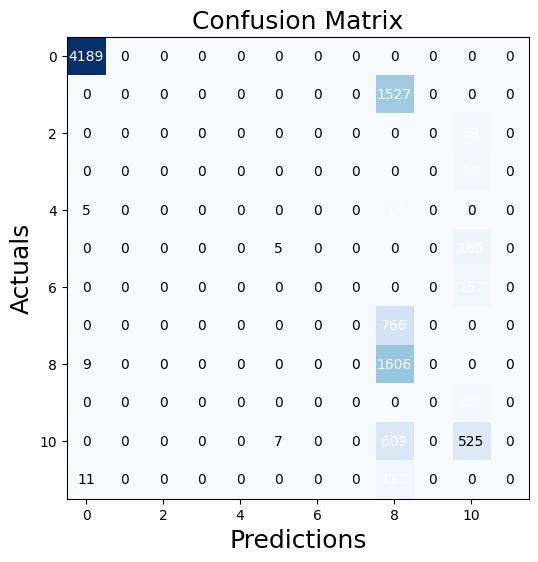

In [16]:
train_preds = cv.predict(X_train)
print('Training Accuracy : ', metrics.accuracy_score(y_train, train_preds))

val_preds = cv.predict(X_test)
print('Validation Accuracy : ', metrics.accuracy_score(y_test, val_preds))
print()
print("Classification Report:")
print(metrics.classification_report(y_test, val_preds))
print("Confusion Matix: ")
conf_matrix = metrics.confusion_matrix(y_test, val_preds)

#Display Confusion Matrix
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(6, 6), cmap=plt.cm.Blues)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [17]:
data

,Atmospheric Pressure,Cloud Cover (%),Dew Point,UV Index,Visibility,Wind Gust,humidity,precip_mm,temp_c,wind_kmph,city_encoded,condition_encoded,year,month,day,hour,month_sin,month_cos,hour_sin,hour_cos
0,0.113987,1.229855,0.580229,-0.163094,0.327851,-0.030745,0.264319,-0.245888,0.757689,-0.030745,3,7,2022,6,1,0,1.224647e-16,-1.000000,0.000000,1.000000
1,0.113987,1.229855,0.580229,-0.163094,0.327851,-0.030745,0.264319,-0.245888,0.757689,-0.030745,3,7,2022,6,1,1,1.224647e-16,-1.000000,0.258819,0.965926
2,0.113987,1.229855,0.580229,-0.163094,0.327851,-0.030745,0.264319,-0.245888,0.757689,-0.030745,3,7,2022,6,1,2,1.224647e-16,-1.000000,0.500000,0.866025
3,0.113987,1.229855,0.580229,-0.163094,0.327851,-0.030745,0.264319,-0.245888,0.757689,-0.030745,3,7,2022,6,1,3,1.224647e-16,-1.000000,0.707107,0.707107
4,0.113987,1.229855,0.580229,-0.163094,0.327851,-0.030745,0.264319,-0.245888,0.757689,-0.030745,3,7,2022,6,1,4,1.224647e-16,-1.000000,0.866025,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49681,-0.342235,-0.433656,0.854212,-0.163094,0.327851,0.924915,0.264319,-0.245888,1.611356,0.924915,4,8,2023,5,11,20,5.000000e-01,-0.866025,-0.866025,0.500000
49682,-0.342235,-0.433656,0.854212,-0.163094,0.327851,0.924915,0.264319,-0.245888,1.611356,0.924915,4,8,2023,5,11,21,5.000000e-01,-0.866025,-0.707107,0.707107
49683,-0.342235,-0.433656,0.854212,-0.163094,0.327851,0.924915,0.264319,-0.245888,1.611356,0.924915,4,8,2023,5,11,22,5.000000e-01,-0.866025,-0.500000,0.866025
49684,-0.342235,-0.433656,0.854212,-0.163094,0.327851,0.924915,0.264319,-0.245888,1.611356,0.924915,4,8,2023,5,11,23,5.000000e-01,-0.866025,-0.258819,0.965926


In [18]:
deep_test = np.array([[-0.342235,	-0.433656,	0.854212,	-0.163094,	0.327851,	0.924915,	0.264319,	-0.245888,	1.611356,	0.924915,	4,	5,	11,	23,	5.000000e-01,	-0.866025,	-0.258819,	0.965926]])
deep_test = np.reshape(deep_test, (deep_test.shape[0], 1, deep_test.shape[1]))

In [19]:
#making predictions
log_pred = models[0].predict([[-0.342235,	-0.433656,	0.854212,	-0.163094,	0.327851,	0.924915,	0.264319,	-0.245888,	1.611356,	0.924915,	4,	5,	11,	23,	5.000000e-01,	-0.866025,	-0.258819,	0.965926]])
svc_pred = models[2].predict([[-0.342235,	-0.433656,	0.854212,	-0.163094,	0.327851,	0.924915,	0.264319,	-0.245888,	1.611356,	0.924915,	4,	5,	11,	23,	5.000000e-01,	-0.866025,	-0.258819,	0.965926]])
knn_pred = models[3].predict([[-0.342235,	-0.433656,	0.854212,	-0.163094,	0.327851,	0.924915,	0.264319,	-0.245888,	1.611356,	0.924915,	4,	5,	11,	23,	5.000000e-01,	-0.866025,	-0.258819,	0.965926]])
dnn = model_dense.predict(deep_test)

print("Logistic Regression Prediction: ", log_pred)
print("SVC Prediction: ", svc_pred)
print("KNN Prediction: ", knn_pred)
print("Deep Learning Prediction: ", dnn)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


1/1 [==============================] - 6s 6s/step
Logistic Regression Prediction:  [8]
SVC Prediction:  [8]
KNN Prediction:  [0]
Deep Learning Prediction:  [[[0.49831566]]]


In [20]:
ensemble_predictions = np.mean([log_pred, svc_pred, knn_pred, dnn], axis=0)
print(ensemble_predictions)

[4.124578915536404]


/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:163: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asanyarray(a)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9009861139062185
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4189
           1       0.79      0.96      0.87      1527
           2       0.78      0.90      0.83        59
           3       0.98      0.67      0.80        88
           4       0.83      0.91      0.87        22
           5       0.97      0.93      0.95       170
           6       0.92      0.46      0.62       157
           7       0.86      0.74      0.80       766
           8       0.91      0.89      0.90      1615
           9       1.00      0.15      0.25        62
          10       0.81      0.76      0.78      1141
          11       1.00      0.60      0.75       142

    accuracy                           0.90      9938
   macro avg       0.90      0.75      0.78      9938
weighted avg       0.90      0.90      0.90      9938

Confusion Matix: 


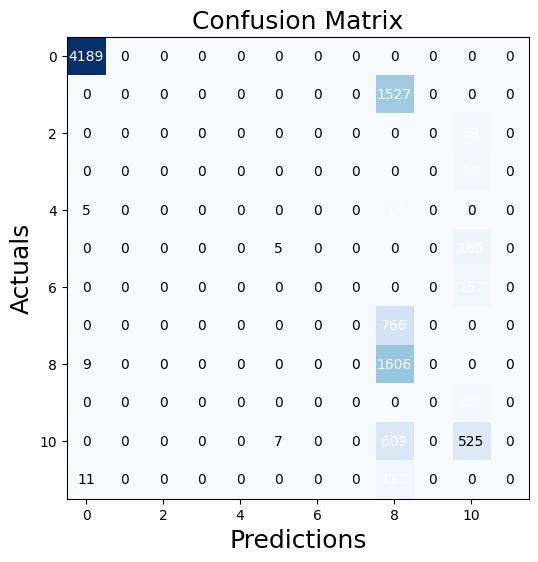

In [21]:
from sklearn.ensemble import VotingClassifier

# Create the ensemble by specifying the models and voting strategy
ensemble = VotingClassifier(
    estimators=[
        ('logistic_regression', models[0]),
        ('svc', models[2]),
        ('knn', models[3])
    ],
    voting='hard'  # Use 'hard' voting for majority voting
)

# Fit the ensemble model on the training data
ensemble.fit(X_train, y_train)

# Make predictions with the ensemble model
ensemble_predictions = ensemble.predict(X_test)

# Evaluate the ensemble predictions
accuracy = metrics.accuracy_score(y_test, ensemble_predictions)
classification_report = metrics.classification_report(y_test, ensemble_predictions)

print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report)
print("Confusion Matix: ")
conf_matrix = metrics.confusion_matrix(y_test, val_preds)

#Display Confusion Matrix
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(6, 6), cmap=plt.cm.Blues)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


In [22]:
ensemble.predict([[-0.342235,	-0.608762,	0.788978,	-0.163094,	0.327851,	0.858241,	0.223395,	-0.245888,	1.570706,	0.858241,	4,	5,	12,	0,	5.000000e-01,	-0.866025,	0.000000,	1.000000]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
"""#saving the models
from joblib import dump

# Save Logistic Regression model
dump(models[0], 'logistic_regression_model.joblib')

# Save XGBoost model
dump(models[1], 'xgb_model.joblib')

# Save SVC model
dump(models[2], 'svc_model.joblib')

# Save KNN model
dump(models[3], 'knn_model.joblib')

# Save AdaBoost model
dump(models[4], 'adaboost_model.joblib')

# Save AdaBoost model
dump(cv, 'GridSearchCV_model.joblib')

# Save AdaBoost model
dump(model_dense, 'Deep-Learning_model.joblib')

# Save AdaBoost model
dump(ensemble, 'ensemble_model.joblib')"""

['ensemble_model.joblib']

In [ ]:
"""import pickle

# Save models
with open('logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(models[0], file, protocol=2)
with open('xgb_model.pkl', 'wb') as file:
    pickle.dump(models[1], file, protocol=2)
with open('svc_model.pkl', 'wb') as file:
    pickle.dump(models[2], file, protocol=2)
with open('knn_model.pkl', 'wb') as file:
    pickle.dump(models[3], file, protocol=2)
with open('adaboost_model.pkl', 'wb') as file:
    pickle.dump(models[4], file, protocol=2)
with open('GridsearchCV_model.pkl', 'wb') as file:
    pickle.dump(cv, file, protocol=2)
with open('Deep_Learning_model.pkl', 'wb') as file:
    pickle.dump(model_dense, file, protocol=2)
with open('ensemble_model.pkl', 'wb') as file:
    pickle.dump(ensemble, file, protocol=2)
"""